# PROJETO INTERDISCIPLINAR PARA SISTEMAS DE INFORMAÇÃO IV
## PROJETO FINAL

*Aluna: Marília Gouveia Rodrigues Costa*

__________________________

#### INFORMAÇÕES BÁSICAS SOBRE O PROJETO

##### APLICAÇÕES ESCOLHIDAS

- Aplicação de **reconhecimento facial ou de objetos** utilizando o **Amazon Rekognition**;
- Criação de um serviço **Text-to-Speech (TTS)** utilizando **Amazon Polly**;

##### OBJETIVOS DO PROJETO

- ###### OBJETIVO GERAL

Desenvolvimento de um sistema para **renhecimento de fotos de pessoas famosas**, que reconheça a pessoa e reproduza seu nome em um alto-falante.

- ###### OBJETIVO ESPECÍFICOS

Desenvolvimento de um sistema capaz de reconhecer um ou mais famosos em fotos e reproduzir seu nome em um alto-falante.

##### SERVIÇOS UTILIZADOS

- Amazon SageMaker: Plataforma de aprendizado de máquina na nuvem;
- Amazon Rekognition: Plataforma de serviço de visão computacional;
- Amazon Polly: Plataforma capaz de converter texto em áudio falado;

__________________________

#### CÓDIGO

##### INSTALAÇÃO DE MÓDULOS

##### IMPORTAÇÃO DE PACOTES PYTHON

Importação de pacotes do Python que serão necessários para o desenvolvimento do projeto.

- *boto3*: Kit de desenvolvimento de software (SDK) da Amazon Web Services (AWS) para Python, que tem como objetivo facilitar a integração do script Python aos serviços da AWS;
- *matplotlib*: Fornecimento de funções de plotagem;
- *PIL*: Biblioteca de imagens do Python, que possui um conjunto de ferramentas destinadas ao desenho de imagens;

In [106]:
import boto3

from matplotlib import pyplot as plt

from PIL import Image, ImageDraw, ImageColor, ImageOps

##### CRIAÇÃO DE CLIENTES DE SERVIÇOS

Cria clientes de serviços do Amazon Rekognition e do Amazon Polly.

- *Criação,  por nome , de clientes de serviços de baixo nível usando a sessão padrão.*

In [107]:
client_amzrekognition = boto3.client("rekognition") # Amazon Rekognition
client_amzpolly = boto3.client("polly") # Amazon Polly

##### DEFINIÇÃO DA FUNÇÃO RESPONSÁVEL PELO RECONHECIMENTO DAS CELEBRIDADE

Define a função resposável por reconhecer os artistas, presentes na foto passada como parâmetro, e indicar quantos foram encontrados, o nome e o id dentro do serviço de reconhecimento de celebridades do Amazon Rekognition de cada, caso haja mais de um, e as posições das caixas delimitadoras na imagem.

In [127]:
def recognize_celebrities(celebrity_photo):
    
    #Abre o arquivo que é passado como parâmetro como uma imagem.
    with open(celebrity_photo, mode = "rb") as image:
        
        # Retona uma matriz de celebridades reconhecidas na imagem passada.
        response = client_amzrekognition.recognize_celebrities (Image = { 
            "Bytes": image.read()
        })
    
    # Retorna um array contendo todas as informações analisadas na foto e existentes no serviço, sobre cada celebridade reconhecida.
    return response['CelebrityFaces']
    

ANOTAÇÕES:

Um dos parâmetros da função "open()" é o "mode" e o mesmo define o modo em que o arquivo será aberto.

- "r":Abre o arquivo para leitura (DEFAULT);
- "b": Abre o arquivo no modo binário;
- "rb" Abre o arquivo no modo binário para leitura;
- "wb": Abre o arquivo no modo binário para escrita;

##### DEFINIÇÃO DA FUNÇÃO RESPONSÁVEL PELO DESENHO DAS CAIXAS DELIMITADORAS

Define a função resposável por desenhar as caixas delimitadoras nos rostos de todas as celebridades que foram reconhecidas na foto e plotar a imagem já com as caixas delimitadoras desenhadas.

In [128]:
def boundingbox(photo, recognition):
    
    #Abre e identifica o arquivo de imagem fornecido.
    image = Image.open(photo)
    
    #Atribui a cada uma das variáveis, respectivamente, a largura e a altura da imagem fornecida.
    img_width, img_height = image.size
    
    #Cria um objeto que pode ser usado para desenhar na imagem fornecida.
    draw = ImageDraw.Draw(image)

    #Desenha uam caixa delimitadora para cada celebridade identificada na foto. 
    for celebrity in recognition:
        
        box = celebrity['Face']['BoundingBox']
        
        #Atribui a variável o valor da coordenada do topo da caixa como uma proporção da altura geral da imagem.
        top = img_height * box['Top']
        #Atribui a variável o valor da largura da caixa como uma proporção da largura geral da imagem.
        width = img_width * box['Width']
        #Atribui a variável o valor da altura da caixa como uma proporção da altura geral da imagem.
        height = img_height * box['Height']
        #Atribui a variável o valor da coordenada esquerda da caixa como uma proporção da largura geral da imagem.
        left = img_width * box['Left']
        
        #Atribui a variável tuplas contendo os pontos (coordenadas) que delimitam uma caixa delimitadora
        coordinates = ((left,top),(left+width,top),(left+width,top+height),(left,top+height),(left,top))

        #Desenha uma linha azul entre os pontos (coordenadas) passados.
        draw.line(coordinates, fill='blue', width=4)
        
    return image

##### ARMAZENAMENTO DA FOTO ESCOLHIDA

Atribui a variável o nome do arquivo da imagem que será analisada.

In [129]:
photo = "photo3.jpg"

##### RECONHECIMENTO DAS CELEBRIDADES

Chama a função recognize_celebrities(celebrity_photo), definida anteriormente, resposável pela indentificação das faces na imagem e do reconhecidas das celebridades.

In [130]:
recognition = recognize_celebrities(photo)

Chama a função recognize_celebrities(celebrity_photo), definida anteriormente, resposável pelo desenho das caixas delititadoras nos rostos das celebridades reconhecidas e pela plotagem da imagem com as caixas desenhadas.

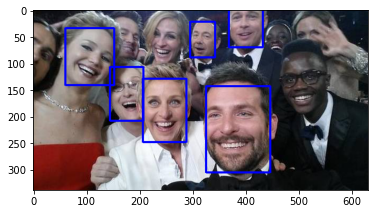

In [132]:
image = boundingbox(photo, recognition)

#Exibe a imagem já com as caixas delimitadoras desenhadas
plt.imshow(image)

##### EXIBAÇÃO DE INFORMAÇÕES SOBRE O RECONHECIMENTO E AS CELEBRIDADES

Imprime importantes informações sobre o reconhecimento e as celebridades reconhecidas. Além de armazer uma lista com o nome nome das celebridades detectadas.

- Define uma lista vazia. Essa lista será responsável por armazenar os nomes das celebridades reconhecidas.

In [133]:
celebrities_list = []

- Imprime na tela informações sobre:

  - O RECONHECIMENTO DAS CELEBRIDADES: Quantidade de celebridades reconhecidas;
  - AS CELEBRIDADES: Nome e o id dentro do serviço de reconhecimento de celebridades do Amazon Rekognition de cada, caso haja mais de um;

In [134]:
# Imprime o nome do arquivo que está sendo analisada.   
print("DETECÇÃO DE FACES PRESENTES NA IMAGEM " + "'" + photo + "'" + "\n")
    
# Imprime a quantidade de faces que foram identificadas no reconhecimento.
print("CELEBRIDADES DETECTADAS: " + str(len(recognition)) + "\n")
        
#Imprime, para cada celebridade reconhecida, seu nome, id e a caixa delimitadora.
for celebrity in recognition:
    
    celebrities_list.append(celebrity["Name"])
    
    #Imprime o nome da celebridade.
    print ("Nome: " + celebrity["Name"])
    #Imprime o id da celebridade dentro do serviço de reconhecimento de celebridades do Amazon Rekognition.
    print ("Id: " + celebrity["Id"]+ "\n")   
       

DETECÇÃO DE FACES PRESENTES NA IMAGEM 'photo3.jpg'

CELEBRIDADES DETECTADAS: 6

Nome: Bradley Cooper
Id: 1u73Lk

Nome: Jennifer Lawrence
Id: 3HD3Qm3e

Nome: Ellen DeGeneres
Id: 4aD7HD8R

Nome: Meryl Streep
Id: 24Mx5De

Nome: Brad Pitt
Id: 1q4IR5

Nome: Kevin Spacey
Id: 2YB8Tw8B



- Imprime, em sequência, o nome de todas as celebridades que foram reconhecidas durante a análise da foto.

In [135]:
for names in celebrities_list:
    print(names)

Bradley Cooper
Jennifer Lawrence
Ellen DeGeneres
Meryl Streep
Brad Pitt
Kevin Spacey


##### DEFINIÇÃO DA FUNÇÃO RESPONSÁVEL PELA LEITURA DOS NOMES DAS CELEBRIDADESDETECTADAS

Define a função resposável por realizar a criação de um áudio mp3, contendo a fala sintetizada dos nomes das celebridades presentes na foto passada como parâmetro.

In [147]:
def read_names(celebrities_names):
    
    #Sintetiza a string passada para um fluxo de bytes.
    response = client_amzpolly.synthesize_speech(
        Text = celebrities_names, 
        VoiceId = "Salli", 
        OutputFormat = "mp3"
    )
    
    #Abre o novo arquivo (file) "celebrities_names.mp3" como um objeto de arquivo (file object).
    file = open("celebrities_names.mp3", mode = "wb")
    
    #"Escreve" dentro do arquivo a leitura do fluxo de áudio que é passado.
    file.write(response["AudioStream"].read())
    
    #Fecha o arquivo
    file.close()

##### LEITURA DOS NOMES DAS CELEBRIDADES DETECTADAS

Realiza a leitura do nome das celebridades detectadas na foto analisada.

- "Converte" uma lista em uma string. Separando cada elemento por um ponto mais um espaço em braco (". ").

In [148]:
celebrities_names = ""
celebrities_names = ". ".join(map(str, celebrities_list))

ANOTAÇÕES:
    
- .join(): Junta todos os intens da tupla em uma string, usando um caractere de específico como separador.

- Imprime uma string com o nome de todas as celebridades detectadas na foto.

In [149]:
print(celebrities_names)

Bradley Cooper. Jennifer Lawrence. Ellen DeGeneres. Meryl Streep. Brad Pitt. Kevin Spacey


- Chama a função read_names(celebrities_names), definida anteriormente, e que resposável pela leitura dos nomes das celebridades.

In [150]:
read_names(celebrities_names)

##### REPRODUÇÃO FALA DOS NOMES DAS CELEBRIDADES

- Reproduz o áudio mp3 contendo a leitura dos nomes das celebridades.